In [589]:
import seaborn as sns
import matplotlib.pyplot as plt

In [590]:
import pandas as pd
import numpy as np
import folium
import requests 
import json 
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

In [591]:
ready_df = pd.read_csv('Riyadh Neighbourhood with coordinates.csv',engine='python')

In [592]:
ready_df

,Neighborhood,Latitude,Longitude
0,King Abdullah Financial District Riyadh,24.765713,46.638587
1,Al-Manakh Riyadh,24.615833,46.793333
2,Al-Fayha Riyadh,24.683333,46.804444
3,Al-Sa'adah Riyadh,24.651489,46.703000
4,Khashm Al-'Aan Riyadh,24.668800,46.925600
...,...,...,...
89,Al-'Oud Riyadh,24.626966,46.728120
90,Manfuha Riyadh,24.613031,46.722493
91,Mi'kal Riyadh,24.623652,46.714079
92,Al-Deerah (old ) Riyadh,24.633827,46.709435


In [593]:

address = 'Riyadh, Saudi Arabia'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Riyadh, Saudi Arabia are {}, {}.'.format(latitude, longitude))

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Riyadh, Saudi Arabia are 24.6319692, 46.7150648.


In [594]:
map_riyadh = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, neighborhood in zip(ready_df['Latitude'], ready_df['Longitude'] , ready_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_riyadh)
map_riyadh

In [595]:
riyadh_data = ready_df[ready_df['Neighborhood'].str.contains("Riyadh")].reset_index(drop=True)
print(riyadh_data.shape)
riyadh_data.head()

(94, 3)


,Neighborhood,Latitude,Longitude
0,King Abdullah Financial District Riyadh,24.765713,46.638587
1,Al-Manakh Riyadh,24.615833,46.793333
2,Al-Fayha Riyadh,24.683333,46.804444
3,Al-Sa'adah Riyadh,24.651489,46.703000
4,Khashm Al-'Aan Riyadh,24.668800,46.925600


In [596]:
map_riyadh = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(riyadh_data['Latitude'], riyadh_data['Longitude'], riyadh_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7,parse_html=False).add_to(map_riyadh)  
map_riyadh

## Exploring and analysis

In [597]:

CLIENT_ID = 'ATCRF2RROS00FIXIYOZ1WFAKS4RQG2NOUXNYT1JENIDJTZIK' 
CLIENT_SECRET = 'FS1SESUA333J42GPVQTZSKD5PIFZQE4ZLU5XUWFSQZTBA0KO' 
VERSION = '20191204'
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [598]:

df = riyadh_data
riyadh_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'],longitudes=df['Longitude'])

King Abdullah Financial District  Riyadh
Al-Manakh  Riyadh
Al-Fayha  Riyadh
Al-Sa'adah  Riyadh
Khashm Al-'Aan  Riyadh
Al Iskan  Riyadh
Ad Difa'  Riyadh
Al-Selayy  Riyadh
Al-Qouds  Riyadh
Al-Hamra  Riyadh
Al-Andalus  Riyadh
Qortubah (Cordoba)  Riyadh
Gharnatah (Granada)  Riyadh
Al-Nahdhah  Riyadh
Al-M'aizliyyah  Riyadh
Al-Qadisiyah  Riyadh
Al-Rawdhah  Riyadh
Al-Nadheem  Riyadh
Al-Rimayah  Riyadh
Al-Manar  Riyadh
As-Salam  Riyadh
Al-Naseem (West)  Riyadh
Al-Naseem (East)  Riyadh
Al-Arid  Riyadh
Al-Aqiq  Riyadh
Imam Muhammad ibn Saud University main campus  Riyadh
Al-Nafil  Riyadh
Al-Ghadir  Riyadh
Al-Wadi  Riyadh
Hittin  Riyadh
Al-Sahafa  Riyadh
Al-Malga  Riyadh
Sultanah  Riyadh
Dahrat Al-Badi'a  Riyadh
Al-Badi'a  Riyadh
As-Suwaidi  Riyadh
Hijrat Laban  Riyadh
Dharat Laban  Riyadh
Shubra  Riyadh
Al-Urayja Al-Wusta  Riyadh
Al-Urayja  Riyadh
Al-Marwah  Riyadh
Al-Mansuriyya  Riyadh
Al-Shifa  Riyadh
Al-Masani'  Riyadh
Al-Murabba'  Riyadh
Jarir  Riyadh
Al-Rayyan  Riyadh
Al-Rabwah  Riyadh
Al-M

In [599]:
print(riyadh_venues.shape)
riyadh_venues.head()

(1416, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,King Abdullah Financial District Riyadh,24.765713,46.638587,The Art of Banksy,24.762561,46.637365,Art Gallery
1,King Abdullah Financial District Riyadh,24.765713,46.638587,KAFD Zaha Hadid Iconic Station,24.765460,46.638269,Metro Station
2,King Abdullah Financial District Riyadh,24.765713,46.638587,on the go truck,24.768821,46.639260,Food Truck
3,King Abdullah Financial District Riyadh,24.765713,46.638587,وادي مركز الملك عبدالله المالي,24.762613,46.639641,Trail
4,Al-Manakh Riyadh,24.615833,46.793333,Diwaniya,24.618984,46.794865,Hookah Bar


In [600]:
riyadh_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ad Dar Al Baida Riyadh,5,5,5,5,5,5
Al Izdihar Riyadh,23,23,23,23,23,23
Al Mansouriyah Riyadh,10,10,10,10,10,10
Al-'Olayya Riyadh,58,58,58,58,58,58
Al-'Oud Riyadh,4,4,4,4,4,4
...,...,...,...,...,...,...
Shubra Riyadh,22,22,22,22,22,22
Sultanah Riyadh,4,4,4,4,4,4
Syah Riyadh,4,4,4,4,4,4


In [601]:
riyadh_onehot = pd.get_dummies(riyadh_venues[['Venue Category']], prefix="", prefix_sep="")

riyadh_onehot['Neighborhood'] = riyadh_venues['Neighborhood'] 

fixed_columns = [riyadh_onehot.columns[-1]] + list(riyadh_onehot.columns[:-1])
riyadh_onehot = riyadh_onehot[fixed_columns]

riyadh_onehot.head()

,Yoga Studio,ATM,Accessories Store,Afghan Restaurant,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,...,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Video Game Store,Video Store,Warehouse Store,Watch Shop,Women's Store,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [602]:
riyadh_onehot.shape

(1416, 197)

In [603]:

riyadh_grouped = riyadh_onehot.groupby('Neighborhood').mean().reset_index()
riyadh_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Afghan Restaurant,Airport Service,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Video Game Store,Video Store,Warehouse Store,Watch Shop,Women's Store,Yemeni Restaurant
0,Ad Dar Al Baida Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.200000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
1,Al Izdihar Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.043478,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2,Al Mansouriyah Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
3,Al-'Olayya Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.017241,0.017241,0.00,...,0.0,0.0,0.017241,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
4,Al-'Oud Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Shubra Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.045455
82,Sultanah Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
83,Syah Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
84,Umm Al-Hamam Riyadh,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000


In [604]:
riyadh_grouped.shape

(86, 197)

In [605]:
num_top_venues = 5
for neigh in riyadh_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = riyadh_grouped[riyadh_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ad Dar Al Baida  Riyadh----
                  venue  freq
0            Donut Shop   0.2
1   Fried Chicken Joint   0.2
2         Grocery Store   0.2
3    Turkish Restaurant   0.2
4  Fast Food Restaurant   0.2


----Al Izdihar  Riyadh----
            venue  freq
0  Breakfast Spot  0.17
1     Coffee Shop  0.09
2     Pizza Place  0.09
3          Bakery  0.04
4           Track  0.04


----Al Mansouriyah  Riyadh----
                  venue  freq
0          Intersection   0.2
1                  Café   0.2
2   Fried Chicken Joint   0.1
3  Fast Food Restaurant   0.1
4            Smoke Shop   0.1


----Al-'Olayya  Riyadh----
           venue  freq
0          Hotel  0.14
1    Coffee Shop  0.10
2     Restaurant  0.05
3           Café  0.05
4  Jewelry Store  0.03


----Al-'Oud  Riyadh----
                       venue  freq
0             Knitting Store  0.25
1           Arepa Restaurant  0.25
2              Historic Site  0.25
3  Middle Eastern Restaurant  0.25
4                Yoga Studio  0.00

               venue  freq
0          Juice Bar   0.5
1  Convenience Store   0.5
2        Yoga Studio   0.0
3          Pet Store   0.0
4  Other Repair Shop   0.0


----As-Suwaidi  Riyadh----
                       venue  freq
0                Supermarket   0.2
1                 Restaurant   0.2
2        American Restaurant   0.2
3  Middle Eastern Restaurant   0.2
4                   Pharmacy   0.2


----Dahrat Al-Badi'a  Riyadh----
                       venue  freq
0  Middle Eastern Restaurant  0.17
1         Falafel Restaurant  0.17
2                       Farm  0.17
3                Pizza Place  0.17
4                 Food Truck  0.17


----Deerab  Riyadh----
                 venue  freq
0    Indian Restaurant  0.33
1                 Farm  0.33
2           Food Truck  0.33
3          Yoga Studio  0.00
4  Peruvian Restaurant  0.00


----Dharat Laban  Riyadh----
                 venue  freq
0          Shoe Repair  0.17
1       Breakfast Spot  0.17
2  American Restaurant  0.17
3       

In [606]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [607]:
import numpy as np
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = riyadh_grouped['Neighborhood']

for ind in np.arange(riyadh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(riyadh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(86, 11)

## Clustering

In [608]:
from sklearn.cluster import KMeans
import sklearn.cluster.k_means_
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1 ,
  verbose=True)

In [609]:
kclusters = 20
riyadh_grouped_clustering = riyadh_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(riyadh_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[17  6  1  1  6  6  2 18  1  6]
86


In [610]:
df.head()

,Neighborhood,Latitude,Longitude
0,King Abdullah Financial District Riyadh,24.765713,46.638587
1,Al-Manakh Riyadh,24.615833,46.793333
2,Al-Fayha Riyadh,24.683333,46.804444
3,Al-Sa'adah Riyadh,24.651489,46.703000
4,Khashm Al-'Aan Riyadh,24.668800,46.925600


In [611]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
riyadh_merged = df
riyadh_merged = riyadh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood').dropna(axis=0)

riyadh_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,King Abdullah Financial District Riyadh,24.765713,46.638587,9.0,Food Truck,Metro Station,Trail,Art Gallery,Yemeni Restaurant,Fish Market,French Restaurant,Frame Store,Fountain,Food Service
1,Al-Manakh Riyadh,24.615833,46.793333,11.0,Hookah Bar,Yemeni Restaurant,Fish & Chips Shop,French Restaurant,Frame Store,Fountain,Food Truck,Food Service,Food Court,Food & Drink Shop
2,Al-Fayha Riyadh,24.683333,46.804444,6.0,Garden,Burger Joint,Trail,Fast Food Restaurant,Yemeni Restaurant,Fish Market,Frame Store,Fountain,Food Truck,Food Service
3,Al-Sa'adah Riyadh,24.651489,46.703000,15.0,Coffee Shop,Breakfast Spot,Fried Chicken Joint,Plaza,Video Store,Intersection,Dessert Shop,Food Truck,Falafel Restaurant,Supermarket
7,Al-Selayy Riyadh,24.711667,46.724167,5.0,Tunnel,Men's Store,Yemeni Restaurant,Fish Market,French Restaurant,Frame Store,Fountain,Food Truck,Food Service,Food Court


In [612]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(riyadh_merged['Latitude'], riyadh_merged['Longitude'], riyadh_merged['Neighborhood'],riyadh_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [613]:
riyadh_merged.loc[66]

Neighborhood              Al-Shemaysi  Riyadh
Latitude                              24.6238
Longitude                             46.7005
Cluster Labels                             12
1st Most Common Venue             Frame Store
2nd Most Common Venue       Convenience Store
3rd Most Common Venue       Yemeni Restaurant
4th Most Common Venue             Fish Market
5th Most Common Venue       French Restaurant
6th Most Common Venue                Fountain
7th Most Common Venue              Food Truck
8th Most Common Venue            Food Service
9th Most Common Venue              Food Court
10th Most Common Venue      Food & Drink Shop
Name: 66, dtype: object

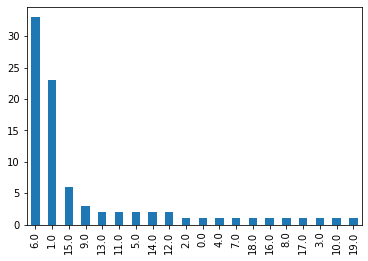

In [614]:
riyadh_merged['Cluster Labels'].value_counts().plot(kind='bar')

In [615]:
riyadh_merged[riyadh_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,Al-Qayrawan Riyadh,24.830387,46.579929,4.0,Resort,Park,Yemeni Restaurant,Fish & Chips Shop,Frame Store,Fountain,Food Truck,Food Service,Food Court,Food & Drink Shop


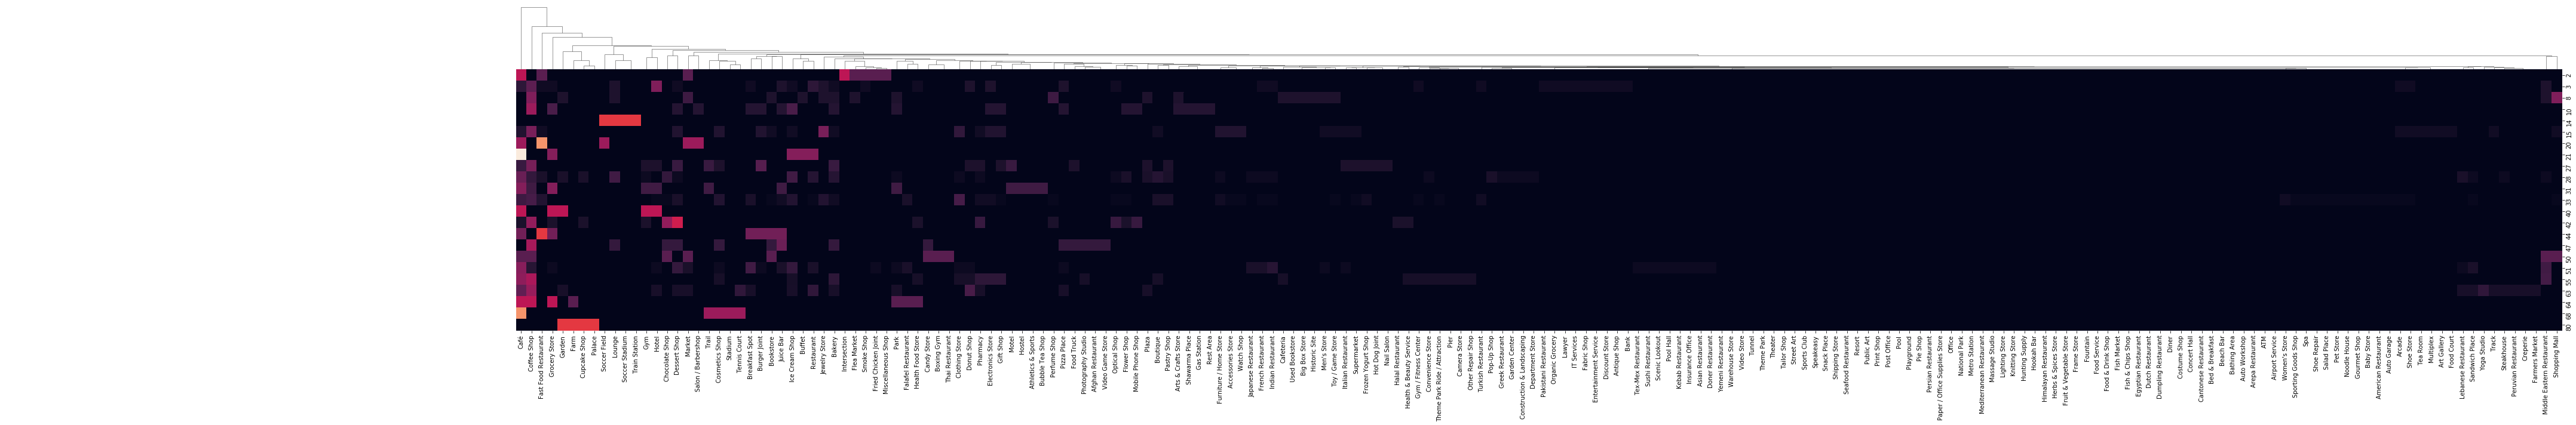

In [616]:
sns.clustermap(riyadh_grouped_clustering[pd.Series(kmeans.labels_).isin([1])],row_cluster=False, xticklabels=1,cbar_pos=None,figsize=(60,10))


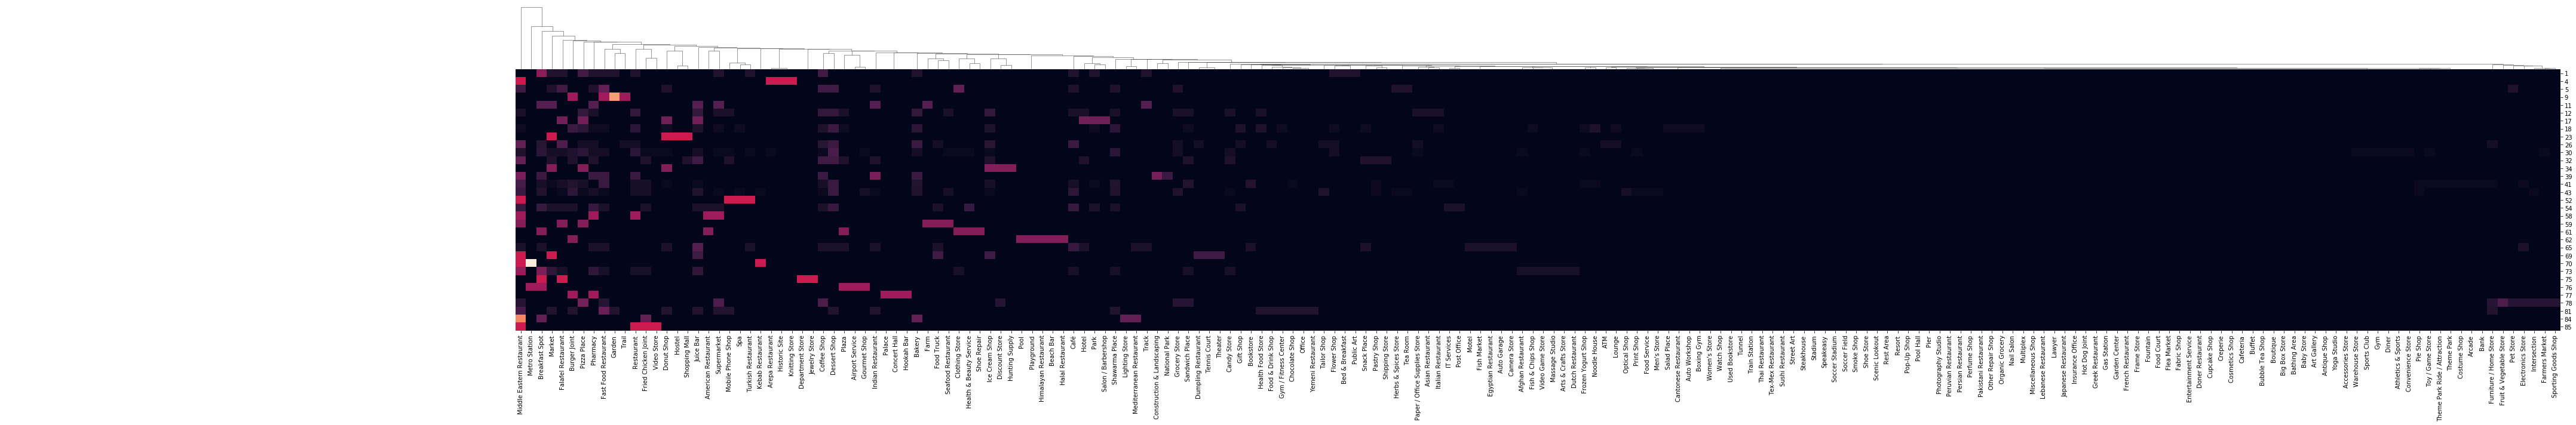

In [617]:
sns.clustermap(riyadh_grouped_clustering[pd.Series(kmeans.labels_).isin([6])],row_cluster=False, xticklabels=1,cbar_pos=None,figsize=(60,10))


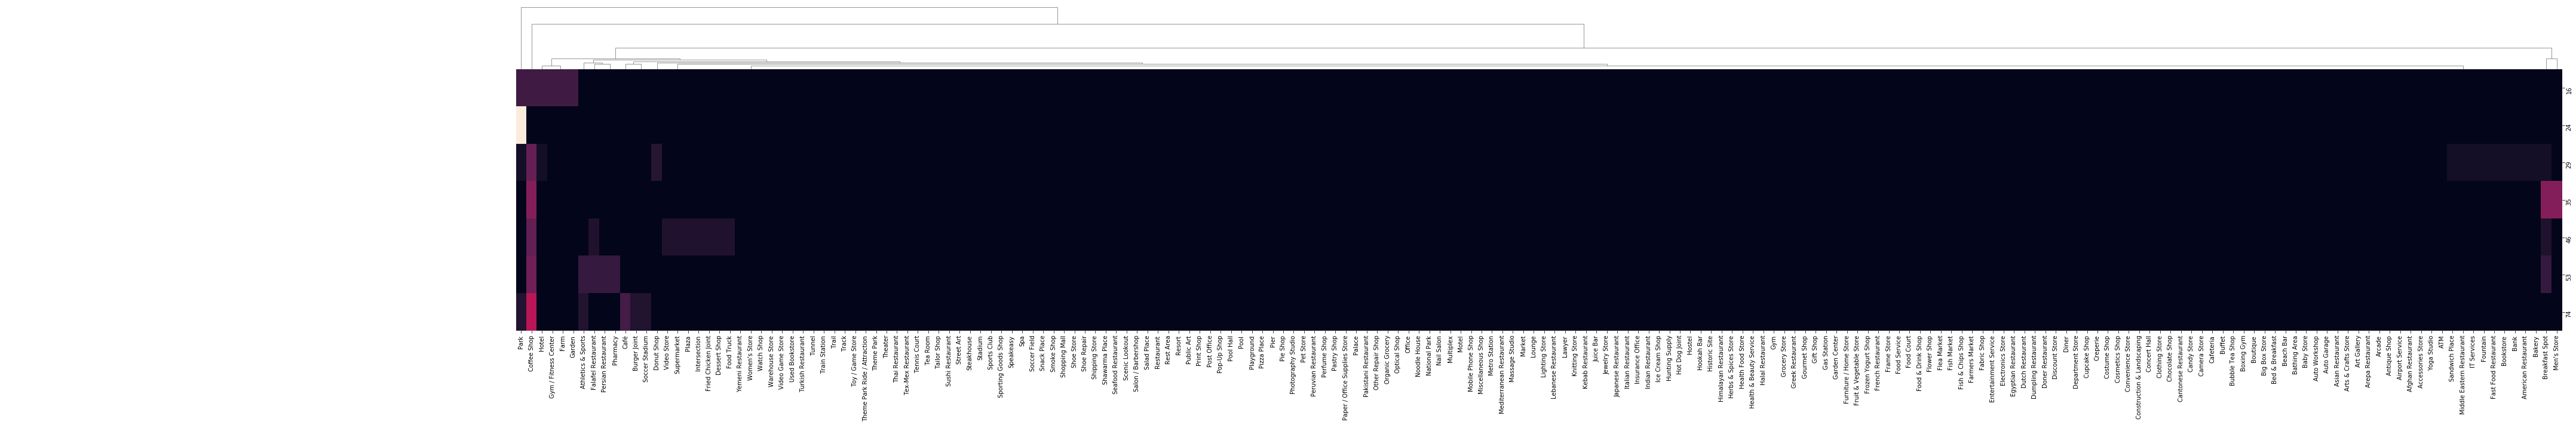

In [618]:
sns.clustermap(riyadh_grouped_clustering[pd.Series(kmeans.labels_).isin([15,16])],row_cluster=False, xticklabels=1,cbar_pos=None,figsize=(60,10))
